In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Generic Data Cleaning and EDA

### Import Data and Check the properties

In [2]:
df=pd.read_csv("Medicare Hospital Spending per Patient_Hospital.csv",encoding='latin1')

In [3]:
df.head()

Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name  Phone Number  \
0    DOTHAN    AL     36301     HOUSTON    3347938701   
1      BOAZ    AL     35957    MARSHALL    2565938310   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400   
3       OPP    AL     36467   COVINGTON    3344933541   
4   LUVERNE    AL     36049    CRENSHAW    3343353374   

                                        Measure Name Measure ID Score  \
0  Medicare hospital spending per patient (Medica...     MSPB_1     1   
1  Medicare hospital spending per patient (Medica...     MSPB_1  0.98   
2  Medicare hospital spending per patient (Medica...     MSPB_1  0.99   
3  Medicare hospital spending per patient (Medica...     MSPB_1  1.09   
4  Medicare hospital spending per patient (Medica...     MSPB_1  1.05   

  Footnote Measure Start Date Measure End Date  
0      NaN         01/01/2015       12/31/2015  
1      NaN         01/01/2015       12/31/2015  
2      NaN         01/01/2015       12/31/2015  
3      NaN         01/01/2015       12/31/2015  
4      NaN         01/01/2015       12/31/2015

In [4]:
df.shape

(4818, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 14 columns):
Provider ID           4818 non-null int64
Hospital Name         4818 non-null object
Address               4818 non-null object
City                  4818 non-null object
State                 4818 non-null object
ZIP Code              4818 non-null int64
County Name           4803 non-null object
Phone Number          4818 non-null int64
Measure Name          4818 non-null object
Measure ID            4818 non-null object
Score                 4818 non-null object
Footnote              1646 non-null object
Measure Start Date    4818 non-null object
Measure End Date      4818 non-null object
dtypes: int64(3), object(11)
memory usage: 527.0+ KB


In [6]:
# Check the data for percentage of null values

round((df.isnull().sum()/df.isnull().count())*100,2)

Provider ID            0.00
Hospital Name          0.00
Address                0.00
City                   0.00
State                  0.00
ZIP Code               0.00
County Name            0.31
Phone Number           0.00
Measure Name           0.00
Measure ID             0.00
Score                  0.00
Footnote              65.84
Measure Start Date     0.00
Measure End Date       0.00
dtype: float64

#### Dropping columns having more than 50% null values and eliminating rows having null values

In [7]:
df= df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(4818, 13)

In [8]:
df=df.dropna(axis=0, how='any')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4810
Data columns (total 13 columns):
Provider ID           4803 non-null int64
Hospital Name         4803 non-null object
Address               4803 non-null object
City                  4803 non-null object
State                 4803 non-null object
ZIP Code              4803 non-null int64
County Name           4803 non-null object
Phone Number          4803 non-null int64
Measure Name          4803 non-null object
Measure ID            4803 non-null object
Score                 4803 non-null object
Measure Start Date    4803 non-null object
Measure End Date      4803 non-null object
dtypes: int64(3), object(10)
memory usage: 525.3+ KB


In [10]:
# Drop duplicate records if any
df=df.drop_duplicates(keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4810
Data columns (total 13 columns):
Provider ID           4803 non-null int64
Hospital Name         4803 non-null object
Address               4803 non-null object
City                  4803 non-null object
State                 4803 non-null object
ZIP Code              4803 non-null int64
County Name           4803 non-null object
Phone Number          4803 non-null int64
Measure Name          4803 non-null object
Measure ID            4803 non-null object
Score                 4803 non-null object
Measure Start Date    4803 non-null object
Measure End Date      4803 non-null object
dtypes: int64(3), object(10)
memory usage: 525.3+ KB


### Removing unwanted data -

### This step will be specific to your dataset 
data where most of the metrics are not available/not applicable wont give any info so removing such records.
Address , city, state can be removed as we have Zip Code 

In [11]:
df=df[~(df["Score"].isin(['Not Applicable','Not Available']))]# & (df["Score"].isin(['Not Applicable','Not Available'])) & (df["Lower Estimate"].isin(['Not Applicable','Not Available'])) & (df["Higher Estimate"].isin(['Not Applicable','Not Available']))]

In [12]:
df=df.drop(["Address","City","State","Phone Number"],axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3170 entries, 0 to 4807
Data columns (total 9 columns):
Provider ID           3170 non-null int64
Hospital Name         3170 non-null object
ZIP Code              3170 non-null int64
County Name           3170 non-null object
Measure Name          3170 non-null object
Measure ID            3170 non-null object
Score                 3170 non-null object
Measure Start Date    3170 non-null object
Measure End Date      3170 non-null object
dtypes: int64(2), object(7)
memory usage: 247.7+ KB


### Converting some categorical variables to numeric

In [14]:
df["Score"] = df["Score"].apply(pd.to_numeric,errors='coerce')


In [15]:
df=df.fillna(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3170 entries, 0 to 4807
Data columns (total 9 columns):
Provider ID           3170 non-null int64
Hospital Name         3170 non-null object
ZIP Code              3170 non-null int64
County Name           3170 non-null object
Measure Name          3170 non-null object
Measure ID            3170 non-null object
Score                 3170 non-null float64
Measure Start Date    3170 non-null object
Measure End Date      3170 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 247.7+ KB


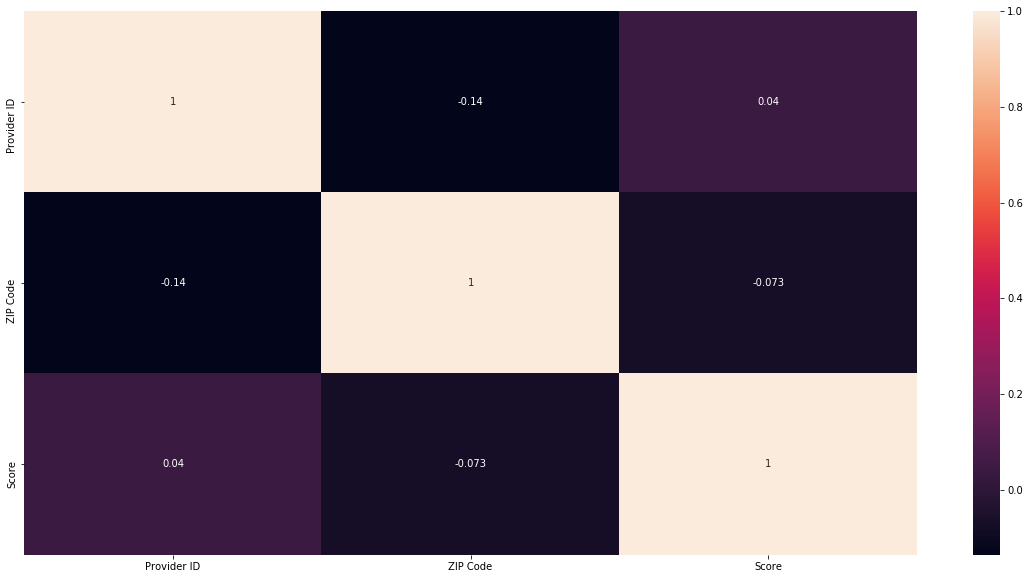

In [17]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

## We can see that there is no significant correlation amoung the columns ; hence heekping all these columns in the dataset for now ; we can later remove certain fields when we merge it to other datasets.

## Writing cleaned data to another file

In [18]:
df.to_csv('Medicare Spending per Patient.csv')

In [19]:
MHSpPP = df[:]
MHSpPP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3170 entries, 0 to 4807
Data columns (total 9 columns):
Provider ID           3170 non-null int64
Hospital Name         3170 non-null object
ZIP Code              3170 non-null int64
County Name           3170 non-null object
Measure Name          3170 non-null object
Measure ID            3170 non-null object
Score                 3170 non-null float64
Measure Start Date    3170 non-null object
Measure End Date      3170 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 247.7+ KB
